## Imports

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("Classified Data")

In [18]:
data.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1000 non-null   int64  
 1   WTT           1000 non-null   float64
 2   PTI           1000 non-null   float64
 3   EQW           1000 non-null   float64
 4   SBI           1000 non-null   float64
 5   LQE           1000 non-null   float64
 6   QWG           1000 non-null   float64
 7   FDJ           1000 non-null   float64
 8   PJF           1000 non-null   float64
 9   HQE           1000 non-null   float64
 10  NXJ           1000 non-null   float64
 11  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 93.9 KB


## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [5]:
scaler = StandardScaler()

In [7]:
scaler.fit(data.drop("TARGET CLASS", axis = 1))

StandardScaler()

In [8]:
scaled_features = scaler.transform(data.drop("TARGET CLASS",axis = 1))

In [11]:
scaled_features

array([[-1.73031962, -0.12354188,  0.18590747, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.72685552, -1.08483602, -0.43034845, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-1.72339142, -0.78870217,  0.33931821, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 1.72339142,  0.64177714, -0.51308341, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 1.72685552,  0.46707241, -0.98278576, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [ 1.73031962, -0.38765353, -0.59589427, ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [12]:
X_scaled = pd.DataFrame(scaled_features, columns=data.columns[:-1])

In [14]:
X_scaled.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [21]:
y = data['TARGET CLASS']

In [22]:
y.head()

0    1
1    0
2    0
3    1
4    1
Name: TARGET CLASS, dtype: int64

In [23]:
X_scaled.shape, y.shape

((1000, 11), (1000,))

## Dividing data
Now that we have scaled our features let us move on to making train and test splits of the data.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 101)

In [25]:
X_train.shape,y_train.shape, X_test.shape, y_test.shape

((700, 11), (700,), (300, 11), (300,))

## Fitting KNN model

The efficiency of predictions using KNN depends highly on the value of `k` or `n_neighbors` chosen.  
We start with a base model that has `n_neighbors = 1` and then later we use the elbow method to get an optimal K value.

In [28]:
KNN = KNeighborsClassifier(n_neighbors=1)

In [29]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

## Prediction and Evaluation

In [31]:
y_preds = KNN.predict(X_test)

In [32]:
print("The accuracy of prediction on the classified data using KNN was {:.2f}".format(accuracy_score(y_test,y_preds)))

The accuracy of prediction on the classified data using KNN was 0.91


In [33]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       159
           1       0.90      0.91      0.91       141

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [34]:
print(confusion_matrix(y_test,y_preds))

[[145  14]
 [ 12 129]]


## Choosing a K Value

Having evaluated our base model we now know a basic workflow for making predictions. Let's now try to get better results by picking an optimal K value using the elbow method.

In [44]:
def plot_k_elbow(X_train, y_train, X_test, y_test, lower=1, upper=50):
    error_rate=[]
    for K in range(lower,upper):
        KNN = KNeighborsClassifier(n_neighbors=K)
        KNN.fit(X_train, y_train)
        y_preds = KNN.predict(X_test)
        error_rate.append(np.mean(y_preds != y_test))
    plt.figure(figsize=(10,6))
    plt.plot(range(lower,upper),error_rate,color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    return error_rate

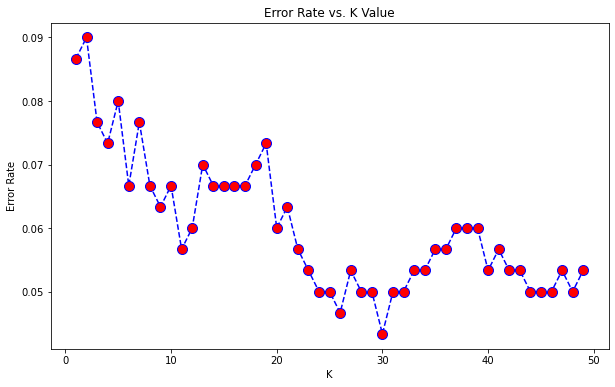

In [45]:
error_rate = plot_k_elbow(X_train, y_train, X_test, y_test, 1,50)

Here we can see that K at 30 gives the lowest error rate and after that it starts to rise again.

In [47]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
KNN = KNeighborsClassifier(n_neighbors=1)

KNN.fit(X_train,y_train)
y_preds = KNN.predict(X_test)

print('WITH K=1')
print('\n')
print("The accuracy of prediction: {:.2f}".format(accuracy_score(y_test,y_preds)))
print('\n')
print(confusion_matrix(y_test,y_preds))
print('\n')
print(classification_report(y_test,y_preds))

WITH K=1


The accuracy of prediction: 0.91


[[145  14]
 [ 12 129]]


              precision    recall  f1-score   support

           0       0.92      0.91      0.92       159
           1       0.90      0.91      0.91       141

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [48]:
# Now with K=30
KNN = KNeighborsClassifier(n_neighbors=30)

KNN.fit(X_train,y_train)
y_preds = KNN.predict(X_test)

print('WITH K=30')
print('\n')
print("The accuracy of prediction: {:.2f}".format(accuracy_score(y_test,y_preds)))
print('\n')
print(confusion_matrix(y_test,y_preds))
print('\n')
print(classification_report(y_test,y_preds))

WITH K=30


The accuracy of prediction: 0.96


[[153   6]
 [  7 134]]


              precision    recall  f1-score   support

           0       0.96      0.96      0.96       159
           1       0.96      0.95      0.95       141

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



We see that we were able to improve our results by just chaanging the K value. We can also try different values for other hyperparameters to obtain even better results.